# Sales Analytics: Business Intelligence Capstone Project

## Introduction

The project presented is an extension of the twist challenge project [](). The objective of the project is to implement a business intelligence pipeline for a small shop which gives the shop owner insights that can drive actionable insights. The main components of the project are;

### 1. Sales Forescasting

A sales forecasting model using Prophet is implemented to help the client (shop owner) plan for the month. The model is currently implementing a 7-day forecast as only 13 months of data is demonstrated here.

### 2. Customer Segmentation

Clustering is implemented using Recency, Frequency and Monetary value of each customer. The segmentation allows for the shop owner to target specific customers for promotions and retention calls.

### 3. Customer Growth Budget

The customer growth budget tracks the growth of customers and classifies them into the following categories;
* New: First time visitors
* Churned: Customers who haven't visited for 2 months consecutively (defined by the client)
* Regained: Previously churned customers who have visited the shop again.

Growth budget is typically used in subscription based services but it can be a powerful insight in this scenario as salons have a database of regular visitors who can be treated as subcribers for analysis purposes.

### 4. Cloud Implementation and Orchestration

The implementation is planned for deployment completely in the cloud. A MySQL server was setup on and Amazon EC2. Apache Airflow is used for the pipeling orchestration with a daily interval. Currently, the extraction of the data is not done from the client premises. For demonstration purposes, the front-end application allows for the client to upload the latest sales data. Orchestraion is demonstrated on a Desktop PC in a completely virtual environment which can be deployed on the Amazon EC2- The t2.micro EC2 used for the project demonstration does not have enough capacity to install Prophet.





## Software

This section gives an overview of the main functions used in the pipeline. Functions will be imported into the notebook as the pipeline was refactored for easy deployment


In [14]:
%%capture
### Library Imports


import pandas as pd
from datetime import datetime as dt
from datetime import date,  timedelta
import s3fs
import configparser

# main modules used in streamlit app and airflow orchestration

from scripts.growth_budget import  *        
from streamlit.app_utilities import *
from scripts.analytics_modules import *



In [13]:
# download latest dataset from S3 Bucket

file = str(date.today()) + ".csv"
config = configparser.ConfigParser()

 # pass credentials for s3
config.read("scripts/credentials.ini")  
key = config["aws"]["AWS_ACCESS_KEY_ID"]
secret = config["aws"]["AWS_SECRET_ACCESS_KEY"]


s3 = s3fs.S3FileSystem(anon=False, key=key, secret=secret)
customer_data = pd.read_csv('s3://salonanalytics/'+file)
customer_data.head()

,Unnamed: 0,Date,Customer,Total
0,0,2020-01,aea36f18ab8d7887628db66b6635d59ba348c4843e9519...,2.0
1,1,2020-01,0b5687f202fcf98d01c9bd071996b3f8066f70b4e16a49...,5.0
2,2,2020-01,fd7182047b43bfd58dcd1c9ccc55c889c9e862f89127df...,6.0
3,3,2020-01,58873afabbba45d3ee3b67e013f1f2be1b5a894f554ae6...,6.0
4,4,2020-01,a302152f779f5db64b74e2258525687738e050a704754f...,20.0


In [15]:
# fixes error in initial dataset due to wrong date formats
customer_data['Date']=pd.to_datetime(customer_data['Date'].astype(str))
customer_data = customer_data[customer_data['Date']> "2020-09-30"]

### Sales Time-Series by Month

In [16]:
grouped_month_df = group_by_month(customer_data)
grouped_month_df.head()

,Total
month-year,
2020-10,7947.4
2020-11,6858.6
2020-12,7709.6
2021-01,6683.8
2021-02,6309.4


<AxesSubplot:xlabel='month-year'>

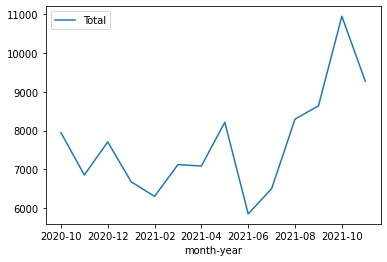

In [17]:
grouped_month_df.plot()